In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [4]:
import pandas_datareader
import datetime

In [5]:
import pandas_datareader.data as web

In [6]:
start = datetime.datetime(2012,1,1)
end = datetime.datetime(2017,1,1)

In [7]:
tesla = web.DataReader('TSLA','yahoo',start,end)

In [8]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,5.900,5.530,5.788,5.616,4640500,5.616
2012-01-04,5.734,5.500,5.642,5.542,3150500,5.542
2012-01-05,5.586,5.370,5.552,5.424,5027500,5.424
2012-01-06,5.558,5.282,5.440,5.382,4931500,5.382
2012-01-09,5.498,5.224,5.400,5.450,4485000,5.450


In [9]:
ford = web.DataReader('F','yahoo',start,end)

In [10]:
gm = web.DataReader('GM','yahoo',start,end)

In [11]:
ford.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.511252
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.625980
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,7.821692
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,7.902675
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,7.963414


In [12]:
gm.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.103352
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.179853
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,16.960161
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,17.533915
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,17.472712


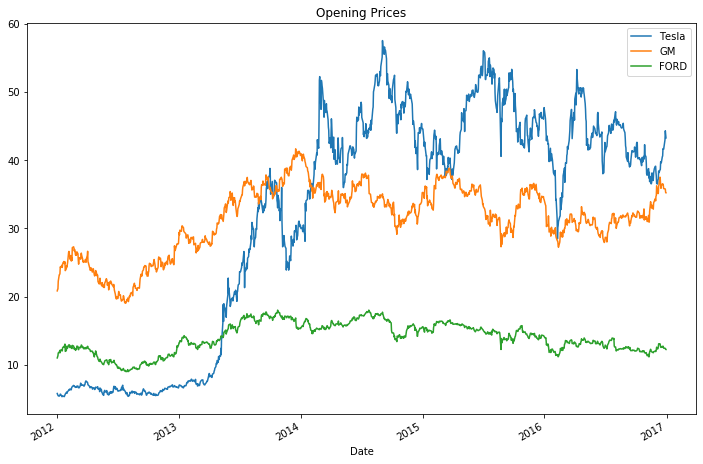

In [13]:
tesla['Open'].plot(label='Tesla',figsize=(12,8),title='Opening Prices')
gm['Open'].plot(label='GM')
ford['Open'].plot(label='FORD')
plt.legend();


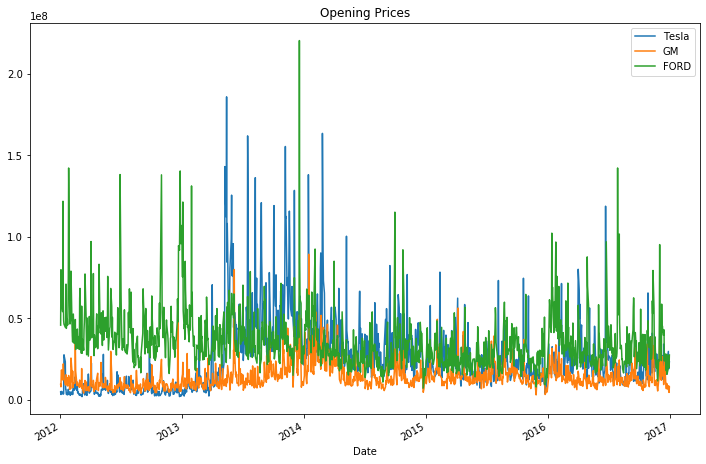

In [14]:
tesla['Volume'].plot(label='Tesla',figsize=(12,8),title='Opening Prices')
gm['Volume'].plot(label='GM')
ford['Volume'].plot(label='FORD')
plt.legend();

In [15]:
ford['Volume'].max()

220363000.0

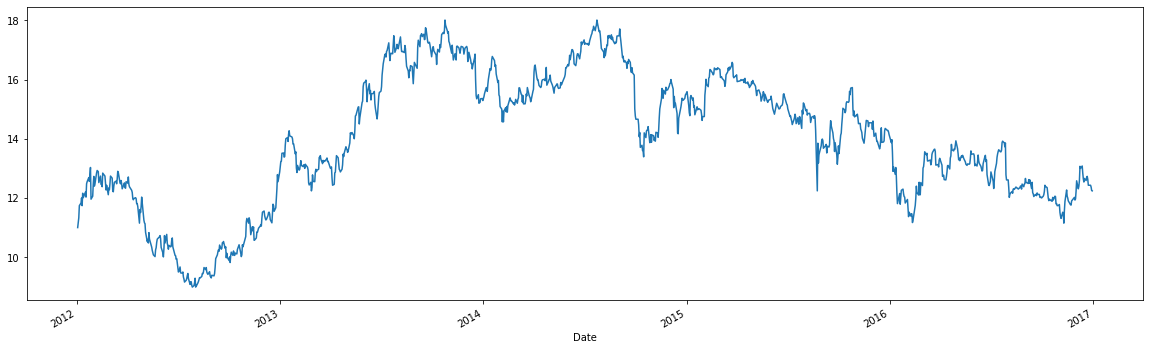

In [16]:
ford['Open'].plot(figsize=(20,6))

In [17]:
tesla['Total Traded'] = tesla['Open']*tesla['Volume']

In [18]:
ford['Total Traded'] = ford['Open']*ford['Volume']

In [19]:
gm['Total Traded'] = gm['Open']*gm['Volume']

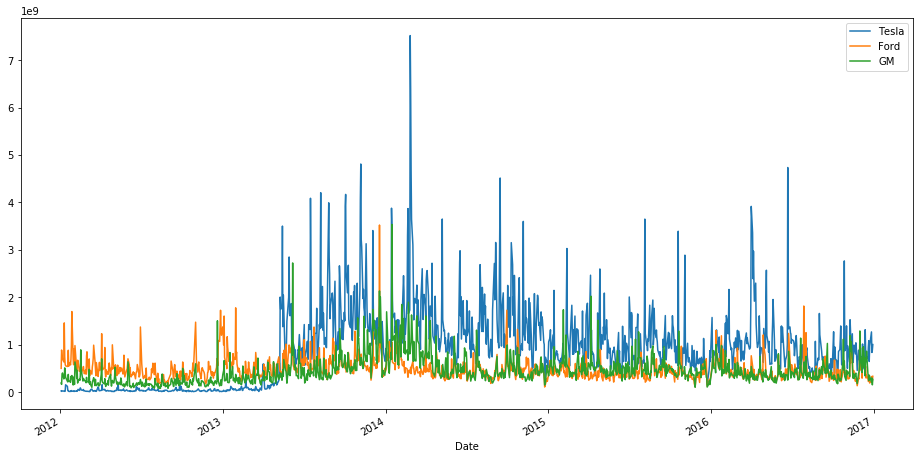

In [20]:
tesla['Total Traded'].plot(label ='Tesla',figsize=(16,8))
ford['Total Traded'].plot(label ='Ford',figsize=(16,8))
gm['Total Traded'].plot(label ='GM',figsize=(16,8))
plt.legend()

In [21]:
tesla['Total Traded'].argmax()

538

### Plot Of Moving Average50 and MA200 for GM

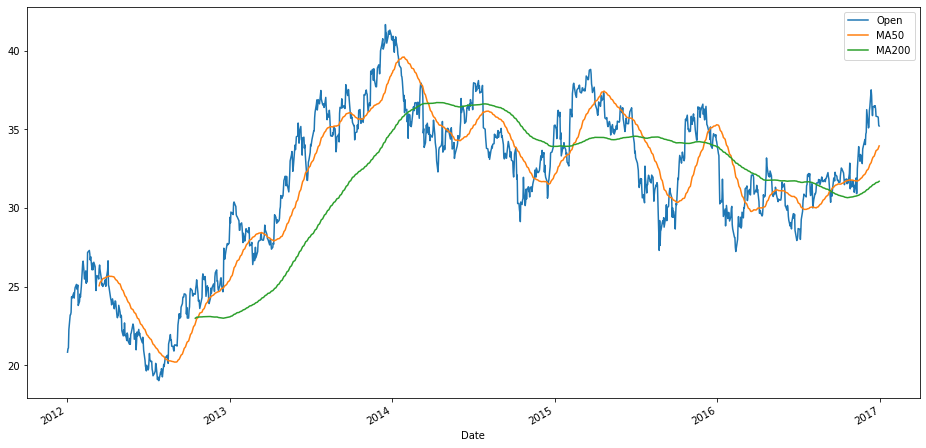

In [22]:
gm['MA50'] = gm['Open'].rolling(50).mean()
gm['MA200'] = gm['Open'].rolling(200).mean()
gm[['Open','MA50','MA200']].plot(figsize=(16,8))

In [23]:
from pandas.plotting import scatter_matrix

In [24]:
car_comp = pd.concat([tesla['Open'],gm['Open'],ford['Open']],axis=1)

In [25]:
car_comp.columns=['Tesla Open','GM Open','Ford Open']
car_comp.head()

,Tesla Open,GM Open,Ford Open
Date,,,
2012-01-03,5.788,20.830000,11.00
2012-01-04,5.642,21.049999,11.15
2012-01-05,5.552,21.100000,11.33
2012-01-06,5.440,22.260000,11.74
2012-01-09,5.400,23.200001,11.83


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027316ABC988>,
      dtype=object)

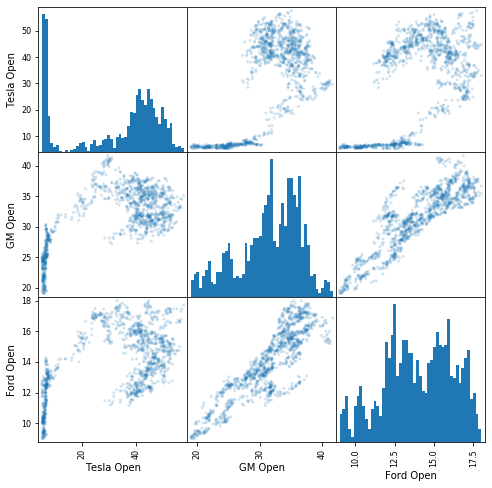

In [26]:
scatter_matrix(car_comp,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50})

In [27]:
from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter,date2num,WeekdayLocator,DayLocator,MONDAY
ford.head()

C:\Users\Pranjul\anaconda2020\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


,High,Low,Open,Close,Volume,Adj Close,Total Traded
Date,,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.511252,5.028089e+08
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.625980,8.889359e+08
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,7.821692,7.690521e+08
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,7.902675,7.025298e+08
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,7.963414,6.386011e+08


In [28]:
ford_reset = ford.loc['2012-01'].reset_index()

In [29]:
ford_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          20 non-null     datetime64[ns]
 1   High          20 non-null     float64       
 2   Low           20 non-null     float64       
 3   Open          20 non-null     float64       
 4   Close         20 non-null     float64       
 5   Volume        20 non-null     float64       
 6   Adj Close     20 non-null     float64       
 7   Total Traded  20 non-null     float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 1.4 KB


In [30]:
ford_reset['date_ax'] = ford_reset['Date'].apply(lambda date:date2num(date))

In [31]:
ford_reset.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Total Traded,date_ax
0,2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.511252,5.028089e+08,734505.0
1,2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.625980,8.889359e+08,734506.0
2,2012-01-05,11.63,11.24,11.33,11.59,67877500.0,7.821692,7.690521e+08,734507.0
3,2012-01-06,11.80,11.52,11.74,11.71,59840700.0,7.902675,7.025298e+08,734508.0
4,2012-01-09,11.95,11.70,11.83,11.80,53981500.0,7.963414,6.386011e+08,734511.0


In [32]:
list_of_cols = ['date_ax','Open','High','Low','Close']
ford_values = [tuple(vals) for vals in ford_reset[list_of_cols].values]

In [33]:
ford_values

[(734505.0, 11.0, 11.25, 10.989999771118164, 11.130000114440918),
 (734506.0,
  11.149999618530273,
  11.529999732971191,
  11.069999694824219,
  11.300000190734863),
 (734507.0,
  11.329999923706055,
  11.630000114440918,
  11.239999771118164,
  11.59000015258789),
 (734508.0,
  11.739999771118164,
  11.800000190734863,
  11.520000457763672,
  11.710000038146973),
 (734511.0,
  11.829999923706055,
  11.949999809265137,
  11.699999809265137,
  11.800000190734863),
 (734512.0, 12.0, 12.050000190734863, 11.630000114440918, 11.800000190734863),
 (734513.0,
  11.739999771118164,
  12.180000305175781,
  11.649999618530273,
  12.069999694824219),
 (734514.0,
  12.15999984741211,
  12.180000305175781,
  11.890000343322754,
  12.140000343322754),
 (734515.0,
  12.010000228881836,
  12.079999923706055,
  11.84000015258789,
  12.039999961853027),
 (734519.0,
  12.199999809265137,
  12.260000228881836,
  11.960000038146973,
  12.020000457763672),
 (734520.0, 12.029999732971191, 12.369999885559082

In [34]:
mondays = WeekdayLocator(MONDAY)
alldays = DayLocator()
weekFormatter = DateFormatter('%d')

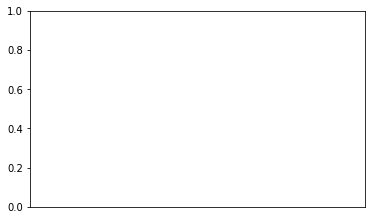

In [35]:
fig,ax = plt.subplots()
fig.subplots_adjust(bottom = 0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)

In [36]:
candlestick_ohlc(ax,ford_values,width=0.8,colorup='g',colordown='r')

([<matplotlib.lines.Line2D at 0x2731542b3c8>,
  <matplotlib.patches.Rectangle at 0x27315440848>])

### Daily Percentage Change

In [37]:
tesla['returns'] = tesla['Close']/tesla['Close'].shift(1)-1

In [38]:
tesla['Close']

Date
2012-01-03     5.616000
2012-01-04     5.542000
2012-01-05     5.424000
2012-01-06     5.382000
2012-01-09     5.450000
                ...    
2016-12-23    42.667999
2016-12-27    43.905998
2016-12-28    43.948002
2016-12-29    42.936001
2016-12-30    42.737999
Name: Close, Length: 1258, dtype: float64

In [39]:
tesla['returns']

Date
2012-01-03         NaN
2012-01-04   -0.013177
2012-01-05   -0.021292
2012-01-06   -0.007743
2012-01-09    0.012635
                ...   
2016-12-23    0.023459
2016-12-27    0.029015
2016-12-28    0.000957
2016-12-29   -0.023027
2016-12-30   -0.004612
Name: returns, Length: 1258, dtype: float64

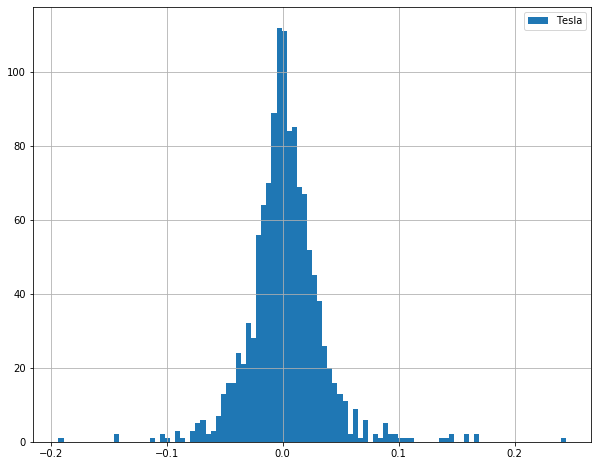

In [40]:
tesla['returns'].hist(bins=100,label='Tesla',figsize=(10,8))
plt.legend()

In [41]:
len(tesla['returns'])

1258

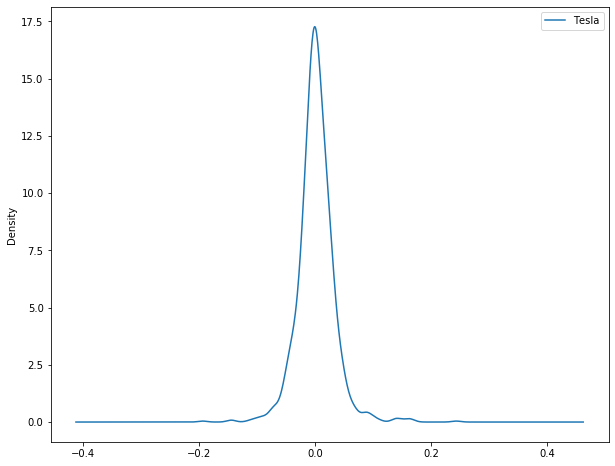

In [42]:
tesla['returns'].plot(kind='kde',label='Tesla',figsize=(10,8))
# gm['returns'].plot(kind='kde',label='GM',figsize=(10,8))
# ford['returns'].plot(kind='kde',label='Ford',figsize=(10,8))
plt.legend()

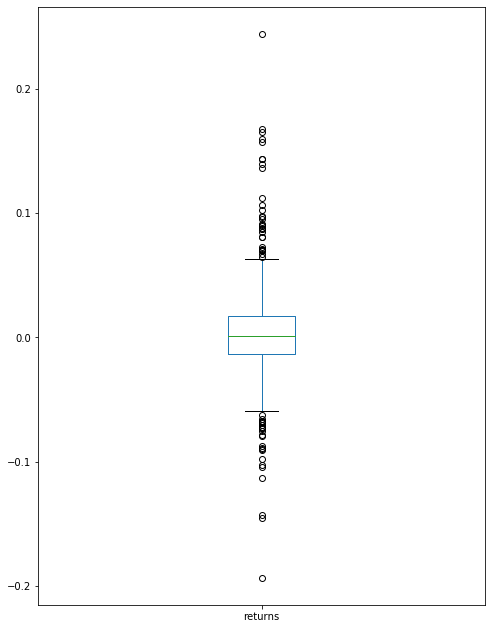

In [43]:
box_df = pd.concat([tesla['returns']])
box_df.columns=['Tesla Ret','Ford Ret','GM Ret']
box_df.plot(kind='box',figsize=(8,11))

### Compairing Daily Returns 

In [44]:
from pandas.plotting import scatter_matrix
#scatter_matrix(box_df,alpha=0.2,figsize=(8,6),hist_kwds={'bins':50})
#scatter_matrix(car_comp,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50})

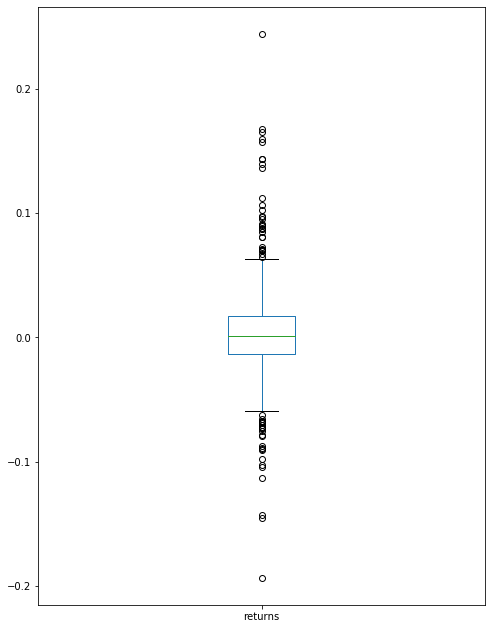

In [45]:
box_df.plot(kind='box',figsize=(8,11))

### Formula for Comulative Returns

In [48]:
tesla['Cumulative Return'] = (1+tesla['returns']).cumprod()

In [49]:
tesla

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns,Cumulative Return
Date,,,,,,,,,
2012-01-03,5.900000,5.530000,5.788000,5.616000,4640500,5.616000,2.685921e+07,NaN,NaN
2012-01-04,5.734000,5.500000,5.642000,5.542000,3150500,5.542000,1.777512e+07,-0.013177,0.986823
2012-01-05,5.586000,5.370000,5.552000,5.424000,5027500,5.424000,2.791268e+07,-0.021292,0.965812
2012-01-06,5.558000,5.282000,5.440000,5.382000,4931500,5.382000,2.682736e+07,-0.007743,0.958333
2012-01-09,5.498000,5.224000,5.400000,5.450000,4485000,5.450000,2.421900e+07,0.012635,0.970442
...,...,...,...,...,...,...,...,...,...
2016-12-23,42.689999,41.542000,41.599998,42.667999,23352500,42.667999,9.714640e+08,0.023459,7.597578
2016-12-27,44.450001,42.883999,42.976002,43.905998,29578500,43.905998,1.271166e+09,0.029015,7.818019
2016-12-28,44.759998,43.439999,44.306000,43.948002,18912500,43.948002,8.379372e+08,0.000957,7.825499


In [ ]:
tesla.plot(label='Tesla',figsize=(16,8))
plt.legg